In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Pre_data = pd.read_csv("C:\\Users\\2019A00303\\Desktop\\Code\\Airbnb Project\\Data\\PreProcessingSpain.csv")
Pre_data

,Unnamed: 0,Host Since,Country,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Price,...,Entire home/apt,Private room,Shared room,Airbed,Couch,Futon,Pull-out Sofa,Real Bed,Day,Month
0,1707,2014-02-03,Spain,40.410106,-3.714754,2.0,1.0,1.0,1.0,36.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,2
1,1708,2011-07-12,Spain,40.416969,-3.709439,2.0,1.0,1.0,1.0,85.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,7
2,1709,2013-06-19,Spain,40.409705,-3.713561,2.0,1.0,1.0,1.0,20.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2,6
3,1710,2012-01-24,Spain,40.423193,-3.711249,4.0,1.0,1.0,2.0,112.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1
4,1711,2013-10-31,Spain,40.416514,-3.717843,8.0,3.0,3.0,4.0,190.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33094,494783,2015-07-03,Spain,41.416785,2.205977,1.0,1.0,1.0,1.0,20.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4,7
33095,494785,2016-04-05,Spain,41.413846,2.199372,2.0,2.0,1.0,1.0,15.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1,4
33096,494786,2016-05-01,Spain,41.415847,2.196185,2.0,1.0,1.0,1.0,30.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,6,5
33097,494788,2011-07-24,Spain,41.420293,2.205545,1.0,1.0,1.0,1.0,20.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,6,7


<AxesSubplot:ylabel='Frequency'>

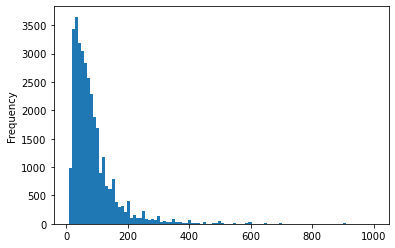

In [2]:
Pre_data['Price'].plot(kind='hist', bins=100)

In [3]:
Pre_data['group'] = pd.cut(x=Pre_data['Price'],
bins=[0, 50, 100, 150, 200, 1000],
labels=['group_1','group_2','group_3','group_4','group_5'])
Pre_data.head()

,Unnamed: 0,Host Since,Country,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Price,...,Private room,Shared room,Airbed,Couch,Futon,Pull-out Sofa,Real Bed,Day,Month,group
0,1707,2014-02-03,Spain,40.410106,-3.714754,2.0,1.0,1.0,1.0,36.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,2,group_1
1,1708,2011-07-12,Spain,40.416969,-3.709439,2.0,1.0,1.0,1.0,85.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,7,group_2
2,1709,2013-06-19,Spain,40.409705,-3.713561,2.0,1.0,1.0,1.0,20.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2,6,group_1
3,1710,2012-01-24,Spain,40.423193,-3.711249,4.0,1.0,1.0,2.0,112.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,group_3
4,1711,2013-10-31,Spain,40.416514,-3.717843,8.0,3.0,3.0,4.0,190.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3,10,group_4


In [4]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(Pre_data, Pre_data["group"]):
    train = Pre_data.loc[train_index]
    test = Pre_data.loc[test_index]

In [5]:
train['group'].value_counts() / len(train)

group_1    0.390196
group_2    0.371049
group_3    0.131803
group_5    0.056082
group_4    0.050871
Name: group, dtype: float64

In [6]:
test['group'].value_counts() / len(test)

group_1    0.390181
group_2    0.370997
group_3    0.131873
group_5    0.056042
group_4    0.050906
Name: group, dtype: float64

In [7]:
train.drop('group', axis=1, inplace=True)
train.head()

,Unnamed: 0,Host Since,Country,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Price,...,Entire home/apt,Private room,Shared room,Airbed,Couch,Futon,Pull-out Sofa,Real Bed,Day,Month
25239,359102,2016-05-06,Spain,39.771433,3.027690,4.0,1.0,2.0,3.0,60.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4,5
2513,30826,2013-01-15,Spain,40.417845,-3.710764,4.0,1.0,2.0,2.0,90.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1
12174,179366,2016-08-08,Spain,41.386212,2.162164,2.0,2.0,1.0,1.0,40.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,8
2733,33364,2011-09-29,Spain,39.301973,3.075036,6.0,0.0,3.0,4.0,130.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3,9
5333,75207,2016-02-17,Spain,39.413916,3.210516,4.0,1.0,2.0,3.0,130.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2,2


In [8]:
test.drop(['Unnamed: 0','group', 'Host Since', 'Country', 'Airbed', 'Couch', 'Futon', 'Pull-out Sofa', 'Real Bed', 'Cleaning Fee'], axis=1, inplace=True)
test.head()

,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Price,Guests Included,Extra People,Minimum Nights,Maximum Nights,Number of Reviews,Entire home/apt,Private room,Shared room,Day,Month
10945,40.409360,-3.709631,2.0,2.0,1.0,1.0,28.0,1.0,10.0,1.0,10.0,5.0,0.0,1.0,0.0,0,9
2585,40.429336,-3.696680,9.0,2.0,6.0,9.0,23.0,1.0,22.0,4.0,10000.0,14.0,0.0,1.0,0.0,2,2
12518,40.411145,-3.707117,4.0,1.0,2.0,2.0,100.0,1.0,0.0,2.0,1125.0,5.0,1.0,0.0,0.0,5,10
25571,40.409543,-3.705945,2.0,1.0,1.0,1.0,28.0,1.0,12.0,1.0,10.0,7.0,0.0,1.0,0.0,4,3
5141,39.899073,3.076948,3.0,1.0,1.0,2.0,39.0,1.0,20.0,3.0,1125.0,41.0,1.0,0.0,0.0,1,8


In [9]:
train_y = train[['Price']]
train_y.head()

,Price
25239,60.0
2513,90.0
12174,40.0
2733,130.0
5333,130.0


In [10]:
train.drop(['Unnamed: 0', 'Price', 'Host Since', 'Country','Airbed', 'Couch', 'Futon', 'Pull-out Sofa', 'Real Bed', 'Cleaning Fee'], axis=1, inplace=True)
train_X = train
train_X.head()

,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Guests Included,Extra People,Minimum Nights,Maximum Nights,Number of Reviews,Entire home/apt,Private room,Shared room,Day,Month
25239,39.771433,3.027690,4.0,1.0,2.0,3.0,1.0,0.0,2.0,1125.0,1.0,1.0,0.0,0.0,4,5
2513,40.417845,-3.710764,4.0,1.0,2.0,2.0,2.0,15.0,3.0,1125.0,74.0,1.0,0.0,0.0,1,1
12174,41.386212,2.162164,2.0,2.0,1.0,1.0,1.0,0.0,2.0,1125.0,28.0,0.0,1.0,0.0,0,8
2733,39.301973,3.075036,6.0,0.0,3.0,4.0,1.0,0.0,4.0,365.0,47.0,1.0,0.0,0.0,3,9
5333,39.413916,3.210516,4.0,1.0,2.0,3.0,1.0,0.0,4.0,1125.0,1.0,1.0,0.0,0.0,2,2


In [11]:
test_y= test[['Price']]
test_y.head()

,Price
10945,28.0
2585,23.0
12518,100.0
25571,28.0
5141,39.0


In [12]:
test.drop('Price', axis=1, inplace=True)
test_X = test
test_X.head()

,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Guests Included,Extra People,Minimum Nights,Maximum Nights,Number of Reviews,Entire home/apt,Private room,Shared room,Day,Month
10945,40.409360,-3.709631,2.0,2.0,1.0,1.0,1.0,10.0,1.0,10.0,5.0,0.0,1.0,0.0,0,9
2585,40.429336,-3.696680,9.0,2.0,6.0,9.0,1.0,22.0,4.0,10000.0,14.0,0.0,1.0,0.0,2,2
12518,40.411145,-3.707117,4.0,1.0,2.0,2.0,1.0,0.0,2.0,1125.0,5.0,1.0,0.0,0.0,5,10
25571,40.409543,-3.705945,2.0,1.0,1.0,1.0,1.0,12.0,1.0,10.0,7.0,0.0,1.0,0.0,4,3
5141,39.899073,3.076948,3.0,1.0,1.0,2.0,1.0,20.0,3.0,1125.0,41.0,1.0,0.0,0.0,1,8


In [13]:
# from sklearn.linear_model import LinearRegression

# l_reg = LinearRegression()
# l_reg.fit(train_X, train_y)

In [14]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import numpy as np

# predictions = l_reg.predict(train_X)
# mse = mean_squared_error(train_y, predictions)
# mae = mean_absolute_error(train_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [15]:
# predictions = l_reg.predict(test_X)
# mse = mean_squared_error(test_y, predictions)
# mae = mean_absolute_error(test_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [16]:
# from sklearn.tree import DecisionTreeRegressor

# d_reg = DecisionTreeRegressor()
# d_reg.fit(train_X, train_y)

In [17]:
# predictions = d_reg.predict(train_X)
# mse = mean_squared_error(train_y, predictions)
# mae = mean_absolute_error(train_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [18]:
# predictions = d_reg.predict(test_X)
# mse = mean_squared_error(test_y, predictions)
# mae = mean_absolute_error(test_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [19]:
# from sklearn.svm import SVR

# svr = SVR()
# svr.fit(train_X, train_y)

In [20]:
# predictions = svr.predict(train_X)
# mse = mean_squared_error(train_y, predictions)
# mae = mean_absolute_error(train_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [21]:
# predictions = svr.predict(test_X)
# mse = mean_squared_error(test_y, predictions)
# mae = mean_absolute_error(test_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [22]:
# from sklearn.neighbors import KNeighborsRegressor
# knn = KNeighborsRegressor()
# knn.fit(train_X, train_y)

In [23]:
# predictions = knn.predict(train_X)
# mse = mean_squared_error(train_y, predictions)
# mae = mean_absolute_error(train_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [24]:
# predictions = knn.predict(test_X)
# mse = mean_squared_error(test_y, predictions)
# mae = mean_absolute_error(test_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [25]:
# from sklearn.neural_network import MLPRegressor

# ann = MLPRegressor()
# ann.fit(train_X, train_y)

In [26]:
# predictions = ann.predict(train_X)
# mse = mean_squared_error(train_y, predictions)
# mae = mean_absolute_error(train_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [27]:
# predictions = ann.predict(test_X)
# mse = mean_squared_error(test_y, predictions)
# mae = mean_absolute_error(test_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [28]:
from sklearn.ensemble import RandomForestRegressor

r_reg = RandomForestRegressor()
r_reg.fit(train_X, train_y)

C:\Users\2019A0~1\AppData\Local\Temp/ipykernel_21172/806139679.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  r_reg.fit(train_X, train_y)


RandomForestRegressor()

Text(0.5, 0, 'Relative Importance')

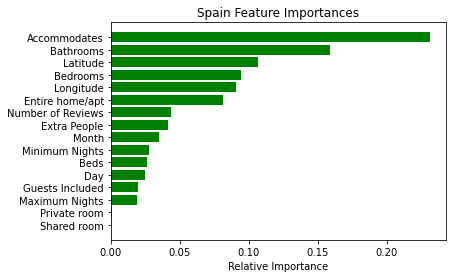

In [29]:
features = train_X.columns
importances = r_reg.feature_importances_
indices = np.argsort(importances)

plt.title('Spain Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

In [30]:
# predictions = r_reg.predict(train_X)
# mse = mean_squared_error(train_y, predictions)
# mae = mean_absolute_error(train_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [31]:
# from sklearn.model_selection import GridSearchCV

# param = {'n_estimators' : [800,900,1000], 'max_features' : ['sqrt','auto','log2'], 'max_depth' : [8,9,10],
#          'min_samples_split': [2,3,4]}

# r_reg = RandomForestRegressor(random_state=42)

# search = GridSearchCV(r_reg, param, cv=5,
#                       scoring='neg_mean_absolute_error')
                      
# search.fit(train_X, train_y['Price'].ravel())

In [32]:
# from sklearn.ensemble import RandomForestRegressor

# r_reg = RandomForestRegressor(bootstrap=True,
#                               min_samples_split=2,
#                               criterion='mse',
#                               max_depth=None,
#                               max_features='auto',
#                               n_estimators=1000,
#                               random_state=42,
#                               )
# r_reg.fit(train_X, train_y['Price'].ravel())

In [33]:
# predictions = r_reg.predict(train_X)
# mse = mean_squared_error(train_y, predictions)
# mae = mean_absolute_error(train_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)